In [7]:
# STAT 381: Introduction to Simple Linear Regression
# Author: Cory Suzuki

import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import statistics
import matplotlib.pyplot as plt

In [18]:
# Referencing Problem 11.4

# Let x represent the book value and y represent the audit value.

y_values = np.array([9, 14, 7, 29, 45, 109, 40, 238, 60, 170])
x_values = np.array([10, 12, 9, 27, 47, 112, 36, 241, 59, 167])
book_data = pd.DataFrame({'X': x_values, 'y': y_values})

# Defining dependent and independent variables.

y = book_data['y']
X = book_data['X']

X_constant  = sm.add_constant(X)  # Adds a constant term to the predictor.

book_model = sm.OLS(y, X_constant)
book_results = book_model.fit()
print(book_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7568.
Date:                Sun, 14 Dec 2025   Prob (F-statistic):           3.40e-13
Time:                        23:39:21   Log-Likelihood:                -22.878
No. Observations:                  10   AIC:                             49.76
Df Residuals:                       8   BIC:                             50.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7198      1.176      0.612      0.5

c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Model is: $$\hat{y} = 0.7198 + 0.9914x$$

In [19]:
# Manual calculations for slope and intercept without using statsmodels, matches with above.

y_values = [9, 14, 7, 29, 45, 109, 40, 238, 60, 170]
x_values = [10, 12, 9, 27, 47, 112, 36, 241, 59, 167]

n = len(x_values)
x_mean = np.mean(x_values)
y_mean = np.mean(y_values)
SS_xy = 0
SS_xx = 0
SS_yy = 0
for i in range(n):
    SS_xy += (x_values[i] - x_mean) * (y_values[i] - y_mean)
    SS_xx += (x_values[i] - x_mean) ** 2
    SS_yy += (y_values[i] - y_mean) ** 2
b1 = SS_xy / SS_xx
b0 = y_mean - (b1 * x_mean)
print(f"Slope: {b1:.2f}, Intercept: {b0:.2f}")

Slope: 0.99, Intercept: 0.72


In [20]:
# Confidence Interval and Hypothesis Test for Slope

# H0: beta1 = 0
# Ha: beta1 ≠ 0

alpha = 0.05
df = n - 2
se_b1 = np.sqrt((1 / (n - 2)) * ((SS_yy - b1 * SS_xy) / SS_xx))
t_critical = stats.t.ppf(1 - alpha/2, df)
margin_of_error = t_critical * se_b1
CI_lower = b1 - margin_of_error
CI_upper = b1 + margin_of_error
print(f"95% Confidence Interval for Slope: ({CI_lower:.2f}, {CI_upper:.2f})")

t_statistic = b1 / se_b1
p_value = 2 * (1 -  stats.t.cdf(abs(t_statistic), df))
print(f"T-Statistic: {t_statistic:.2f}, P-Value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


95% Confidence Interval for Slope: (0.97, 1.02)
T-Statistic: 86.99, P-Value: 0.0000
Reject the null hypothesis


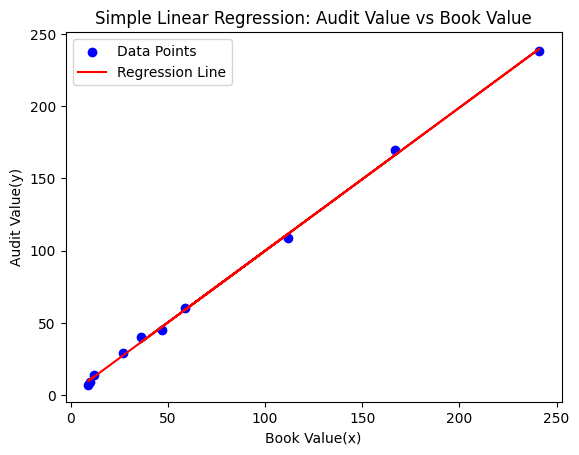

In [22]:

plt.scatter(X, y, color="blue", label="Data Points")
plt.plot(X, book_results.fittedvalues, color="red", label="Regression Line")
plt.xlabel("Book Value(x)")
plt.ylabel("Audit Value(y)")
plt.title("Simple Linear Regression: Audit Value vs Book Value")
plt.legend()
plt.show()